In [1]:
import pandas as pd
%matplotlib inline

In [2]:
cuprum = pd.read_csv('data/VC-CUPRUM.csv', index_col=0, parse_dates=True)
habitad = pd.read_csv('data/VC-HABITAT.csv', index_col=0, parse_dates=True)
modelo = pd.read_csv('data/VC-MODELO.csv', index_col=0, parse_dates=True)

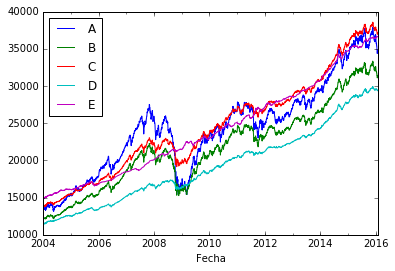

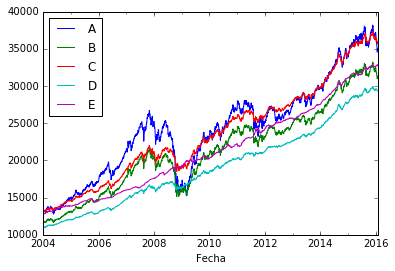

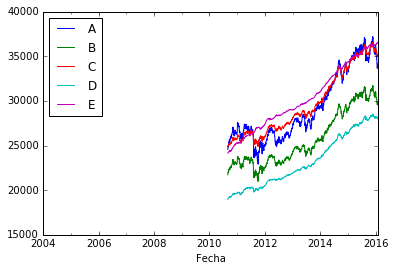

In [3]:
cuprum['2004-01-01':].plot()
habitad['2004-01-01':].plot()
modelo['2004-01-01':].plot()

In [4]:
cuprum['delta'] = cuprum.A - cuprum.E
habitad['delta'] = habitad.A - habitad.E
modelo['delta'] = modelo.A - modelo.E

In [5]:
# Nivel indiferencia riesgo arbitrario, podría delta inicial, media, perc 50, media movil 365, etc.
# Supuesto valor relativo fondo A comparable con E
cuprum['zero'] = pd.rolling_median(cuprum.delta,365)
habitad['zero'] = pd.rolling_median(habitad.delta,365)
modelo['zero'] = pd.rolling_median(modelo.delta,365)
# También podría ser un escalar
cuprum_zero = cuprum.zero
habitad_zero = habitad.zero
modelo_zero = modelo.zero

In [6]:
#cuprum['riesgo'] = ['bajo' if x < cuprum_zero else 'alto' for x in cuprum.delta]
cuprum['riesgo'] = pd.np.where(cuprum['delta'] < cuprum['zero'], 'bajo', 'alto')
cuprum['bajo'] = cuprum.delta[cuprum.delta<cuprum_zero]
cuprum['alto'] = cuprum.delta[cuprum.delta>cuprum_zero]

In [7]:
#habitad['riesgo'] = ['bajo' if x < habitad_zero else 'alto' for x in habitad.delta]
habitad['riesgo'] = pd.np.where(habitad['delta'] < habitad['zero'], 'bajo', 'alto')
habitad['bajo'] = habitad.delta[habitad.delta<habitad_zero]
habitad['alto'] = habitad.delta[habitad.delta>habitad_zero]

In [8]:
#modelo['riesgo'] = ['bajo' if x < modelo_zero else 'alto' for x in modelo.delta]
modelo['riesgo'] = pd.np.where(modelo['delta'] < modelo['zero'], 'bajo', 'alto')
modelo['bajo'] = modelo.delta[modelo.delta<modelo_zero]
modelo['alto'] = modelo.delta[modelo.delta>modelo_zero]

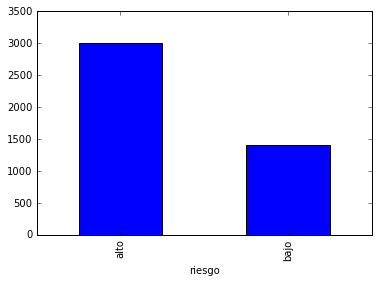

In [9]:
cuprum['2004-01-01':].groupby('riesgo').count()['delta'].plot(kind='bar')

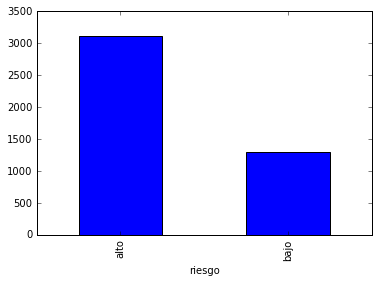

In [10]:
habitad['2004-01-01':].groupby('riesgo').count()['delta'].plot(kind='bar')

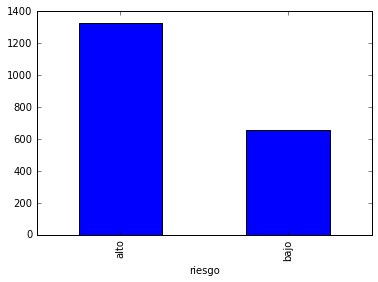

In [11]:
modelo['2004-01-01':].groupby('riesgo').count()['delta'].plot(kind='bar')

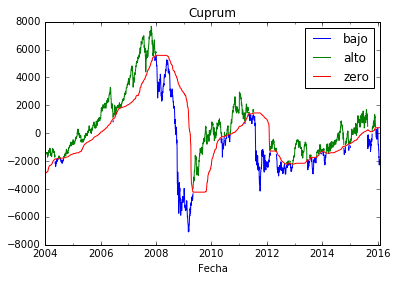

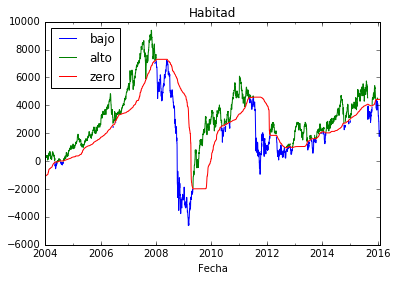

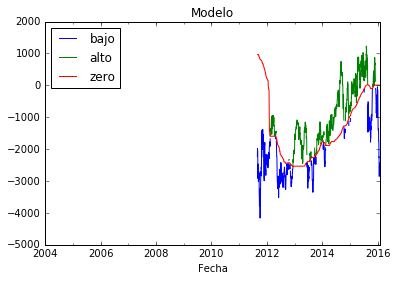

In [12]:
cuprum.loc['2004-01-01':,['bajo','alto','zero']].plot(title='Cuprum')
habitad.loc['2004-01-01':,['bajo','alto','zero']].plot(title='Habitad')
modelo.loc['2004-01-01':,['bajo','alto','zero']].plot(title='Modelo')

### Análisis delta Cuprum

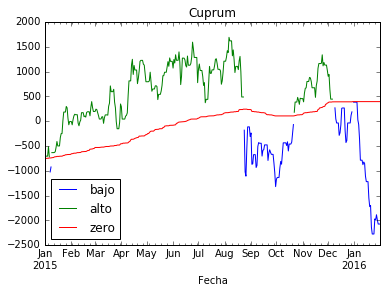

In [13]:
cuprum.loc['2015-01-01':,['bajo','alto','zero']].plot(title='Cuprum')

In [14]:
print 'Inicio A-E Cuprum:', cuprum.delta[cuprum.A.first_valid_index()]

Inicio A-E Cuprum: -3408.81


In [15]:
print 'A-E Cuprum:'
print cuprum.delta.describe()

A-E Cuprum:
count    4932.000000
mean     -216.734943
std      2647.017421
min     -7077.670000
25%     -1915.885000
50%      -573.505000
75%      1227.380000
max      7658.530000
Name: delta, dtype: float64


### Análisis delta Habitad

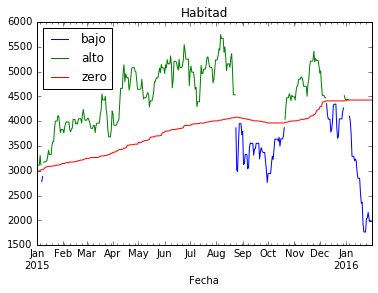

In [16]:
habitad.loc['2015-01-01':,['bajo','alto','zero']].plot(title='Habitad')

In [17]:
print 'Inicio A-E Habitad:', habitad.delta[habitad.A.first_valid_index()]

Inicio A-E Habitad: -1778.23


In [18]:
print 'A-E Habitad:'
print habitad.delta.describe()

A-E Habitad:
count    4932.000000
mean     2333.316352
std      2626.481004
min     -4624.590000
25%       630.732500
50%      2366.040000
75%      4038.157500
max      9379.510000
Name: delta, dtype: float64


### Análisis delta Modelo

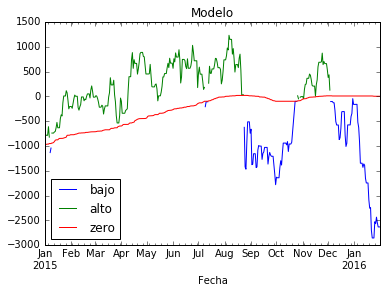

In [19]:
modelo.loc['2015-01-01':,['bajo','alto','zero']].plot(title='Modelo')

In [20]:
print 'Inicio A-E Modelo:', modelo.delta[modelo.A.first_valid_index()]

Inicio A-E Modelo: 408.54


In [21]:
print 'A-E Modelo:'
print modelo.delta.describe()

A-E Modelo:
count    1979.000000
mean    -1006.664068
std      1400.809295
min     -4161.220000
25%     -2185.075000
50%     -1269.260000
75%       191.290000
max      2346.410000
Name: delta, dtype: float64


In [22]:
#%qtconsole

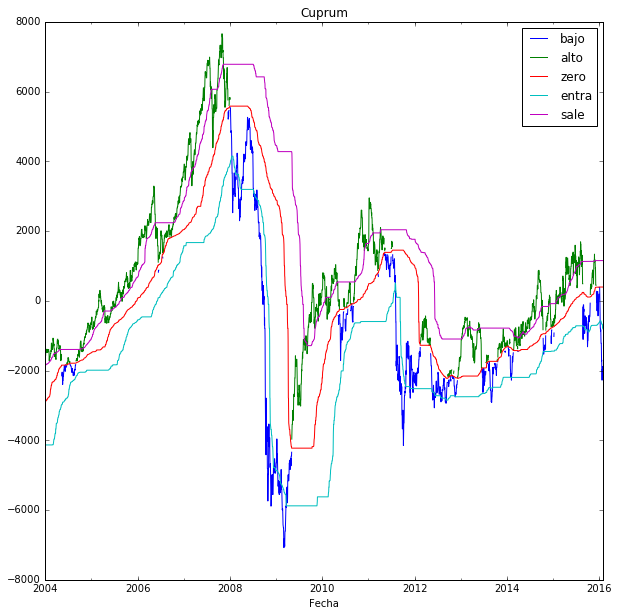

In [23]:
cuprum['entra'] = pd.rolling_quantile(cuprum.delta,365,0.10)
cuprum['sale'] = pd.rolling_quantile(cuprum.delta,365,0.85)
cuprum.loc['2004-01-01':,['bajo','alto','zero','entra','sale']].plot(title='Cuprum', figsize=[10,10])

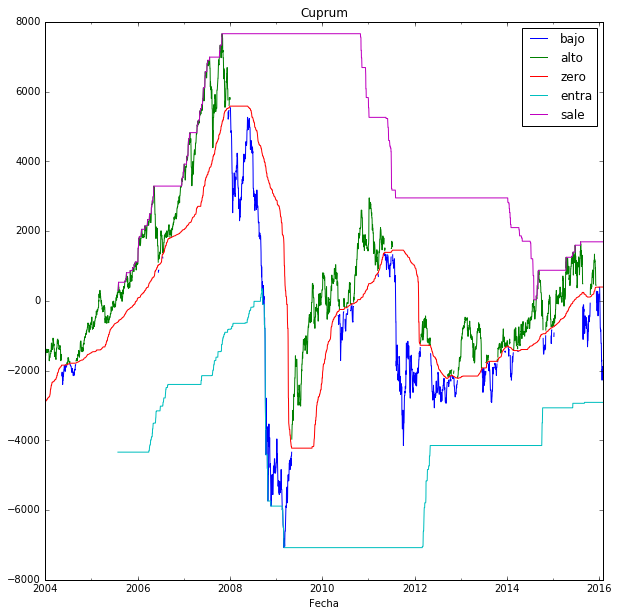

In [24]:
cuprum['entra'] = pd.rolling_min(cuprum.delta,365*3)
cuprum['sale'] = pd.rolling_max(cuprum.delta,365*3)
cuprum.loc['2004-01-01':,['bajo','alto','zero','entra','sale']].plot(title='Cuprum', figsize=[10,10])